# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

# keep matplotlib interactive (notebook) or not (inline)
# NOTE: one must reload matplotlib to change of rendering style
# %matplotlib notebook
%matplotlib inline
# use ggplot style
plt.style.use('ggplot')

# Data Description
Description of transactions

                                                

|                                       transactions.csv                                        |
|-----------------------------------------------------------------------------------------------|
| msno                   | user id  (letters, digits and special characters)                    |
| payment_method_id      | payment method   (masked)                                            |
| payment_plan_days      | length of membership plan in days                                    |
| plan_list_price        | in New Taiwan Dollar (NTD)                                           |
| actual_amount_paid     | in New Taiwan Dollar (NTD)                                           |
| is_auto_renew          | true when customer opted in renewing its subscription automatically  |
| transaction_date       | format %Y%m%d                                                        |
| membership_expire_date | format %Y%m%d                                                        |
| is_cancel              | whether or not the user canceled the membership in this transaction. |



### Transactions

In [2]:
transaction_dir = os.path.join(os.pardir, 'data', 'raw', 'transactions.csv')
df_transac = pd.read_csv(transaction_dir, parse_dates=['transaction_date', 'membership_expire_date'])

In [3]:
df_transac.shape

(21547746, 9)

In [4]:
df_transac.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


In [5]:
# treat payment_method_id as a category
df_transac.payment_method_id = df_transac.payment_method_id.astype('category')

# same for user
df_transac.msno = df_transac.msno.astype('category')

# convert relevant columns to boolean
df_transac.is_auto_renew = df_transac.is_auto_renew.astype(bool)
df_transac.is_cancel = df_transac.is_cancel.astype(bool)

In [6]:
df_transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
msno                      category
payment_method_id         category
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             bool
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 bool
dtypes: bool(2), category(2), datetime64[ns](2), int64(3)
memory usage: 1.0 GB


In [7]:
def plot_bar(df, bar_list, is_Norm=True):
    """
        Make a bar plot using dataframe df and associated columns in bar_list
        is_Norm will normalize distribution by counts
        df: pandas DataFrame
        bar_list: list of column names
    """
    # keep 2 columns and compute number of rows needed in subpots
    subrows = int(np.ceil(len(bar_list) / 2))
    discard_last_ax = bool(len(bar_list) % 2)
    
    # special case when there is only one column specified
    # then keep one figure and make it bigger
    if subrows == 1 and discard_last_ax:
        _ , ax = plt.subplots(figsize=(9,5))
        ax = [ax]
    else:
        _ , ax = plt.subplots(subrows, 2)
        ax = ax.flatten()
    for k, colname in enumerate(bar_list):
        
        # select column and make bar plot
        s_colname = df[colname]
        distrib = s_colname.value_counts(normalize = is_Norm).sort_index()*100
        distrib.plot(kind='bar', ax=ax[k], color='b')
        
        # add percent character to y tick label if plot normalized
        if is_Norm:
            # add percent on y axis labels, uses numerical value of each tick (just in case scale has changed)
#             ax[k].set_yticklabels([ '{:.0f}%'.format(l)  for l in ax[k].get_yticks()])
            pass
        else:
            ax[k].set_ylabel('Count')
                
        # reformat existing x ticklabels to integer (may not be required)
        # When numeric columns have Nans then it will show float number
        # ax[k].set_xticklabels([ '{:.0f}'.format(float(l.get_text()))  for l in ax[k].get_xticklabels()])
        
        # add title
        ax[k].set_title(distrib.name + ' Distribution')
        
        # reset x axis label to 45 rotation
        ax[k].tick_params(axis = 'x', rotation = 45)
        
        # add x axis label
        ax[k].set_xlabel(distrib.name)
        
    # decide to keep last axes
    if discard_last_ax and subrows > 1: ax[-1].set_visible(False)
    plt.tight_layout()
    
    # save figure to file as png
    plt.savefig(os.path.join(os.pardir, 'reports', 'figures', distrib.name +'.png'))

### Payment ID method
Payment ID 41 represents more than 50% of transactions

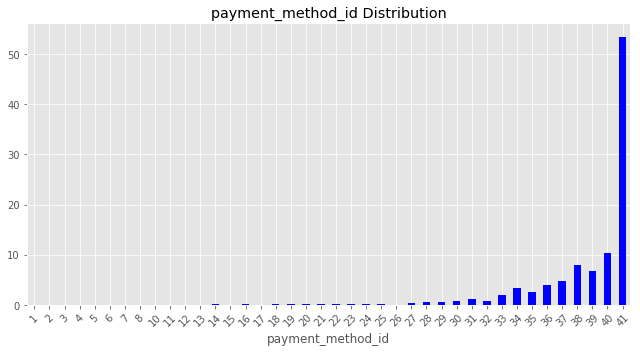

In [8]:
plot_bar(df_transac, ['payment_method_id'])

Here we will only remember if payment ID is 41 or not as it is the most important payment method.

In [9]:
# create new payment column
df_transac['is_payid_41'] = df_transac.payment_method_id == 41

In [10]:
# remove payment method column
df_transac = df_transac.drop('payment_method_id', axis = 1)

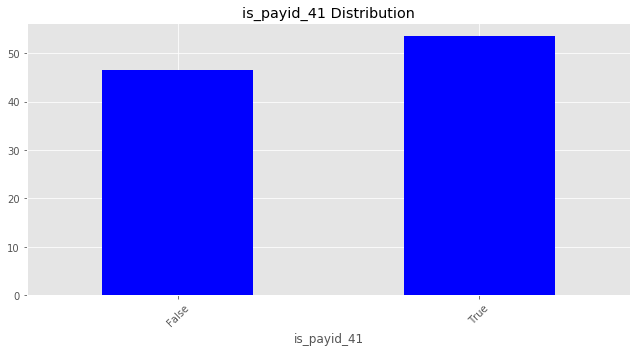

In [11]:
# show new column results
plot_bar(df_transac, ['is_payid_41'])

### Payment Plan in days
There is a lot more variety in subscriptions than expected
from [KKBOX website](https://help.kkbox.com/hk/zh-tw/billing/pay-types/260), here are the options:
1. Options are monthly plan (30/31 days) with automatic renewal (is_auto_renew true) 
2. Single purchase, no automatic renewal but more expensive:
    3. 30 days
    4. 90 days (plus 7 days bonus?)
    5. 180 days (plus 21 days bonus?)
    6. 365 days (plus 50 days bonus?)
There are discount programs too (getting a credit card with their partners and so on)

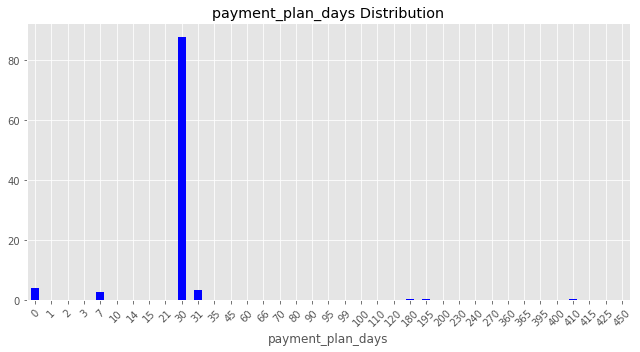

In [12]:
plot_bar(df_transac, ['payment_plan_days'], is_Norm=True)

### A closer look at 0 day plans

Records of 0 day plans also have a list price of 0. All other columns appears to contain legitimate information.

Note that most 0 day plans occur in 2015 except for 3 in 2016 and 1 in 2017.

In [13]:
# set 0 day plans to Nan
df_transac.loc[df_transac.payment_plan_days == 0, 'payment_plan_days'] = np.nan

In [14]:
# select rows where payment plan days are zero
df_zero_day = df_transac[df_transac.payment_plan_days.isnull()]

In [15]:
# number of missing value is small
print( '{:.2f}% of total transactions'.format(df_zero_day.shape[0]/df_transac.shape[0] * 100))

4.04% of total transactions


In [16]:
# show that list prices are also zero
df_zero_day.plan_list_price.sum()

0

### Substitution of 0-day payment plan
* Looking at the time elapsed between two consecutives expiration date is the best way to determine payment plan days. However, current transaction date must be anterior to previous expiration date meaning user always renewed before the expiration date.

* When there is no overlap between successive transaction and expiration dates, then we can estimate using the difference in days between current transaction and its associated expiration date.

* For active cancellation, transaction/expiration dates are not relevant, we can propagate forward last known plan duration.

In [17]:
# sort dataframe by msno, transaction date then expiration date
df_transac.sort_values(['msno', 'transaction_date', 'membership_expire_date'], inplace=True)

In [18]:
# create new column showing preceding expiration date for each user
df_transac['prior_expiration'] = df_transac.groupby('msno', sort = False).membership_expire_date.shift(periods = 1)

#### Estimate payment plan days for users who always renew on time.

In [19]:
# compute delta days when transaction date is anterior to prior expiration date and no active cancellation
crit_mem = (df_transac.transaction_date <= df_transac.prior_expiration) & (df_transac.is_cancel == False)
# NOTE: inequality comparison with NaT will always yield False (meaning first transactions are not considered)

In [20]:
# estimate payment plan days
df_transac.loc[crit_mem,'delta_days'] = (df_transac.loc[crit_mem, 'membership_expire_date'] - \
                                         df_transac.loc[crit_mem, 'prior_expiration']
                                        ).astype('timedelta64[D]')

In [21]:
# percentage of transactions renewed on time WITHOUT automatic renewal
s_timely_renew = df_transac.loc[crit_mem, 'is_auto_renew']
no_auto_renew_fraction = 1 - (s_timely_renew.sum() / len(s_timely_renew))
print('Percentage of timely transaction without automatic renewal = {:.1f}%'.format(no_auto_renew_fraction*100))

Percentage of timely transaction without automatic renewal = 3.8%


#### Estimate payment plan days for independent transactions (no overlap between transaction date and prior expiration date)
For user's first transaction, we cannot tell if there is an overlap or not. We will ignore those for now.

In [22]:
# add rank column to easily identify user's first transactions
df_transac['trans_num'] = df_transac.groupby('msno', sort = False).cumcount()

In [23]:
# Still ignore active cancellation and first transactions
crit_ept = (df_transac.delta_days.isnull()) & (df_transac.is_cancel == False) & (df_transac.trans_num > 0)

In [24]:
# when there is no overlap with prior transaction, use expiration-transaction date difference
df_transac.loc[crit_ept, 'delta_days'] = (df_transac.loc[crit_ept, 'membership_expire_date'] - \
                                         df_transac.loc[crit_ept, 'transaction_date']
                                        ).astype('timedelta64[D]')

#### Estimate payment plan days for active cancellation (expect for first transactions)
At this point we have user's first transactions and active cancellation unfilled. <br> 
Active cancellation only happens when a user has an active plan thus we can use the latest plan duration as a replacement. <br>Note that it won't work for first transactions.

In [25]:
# Use fillna() with forward fill, intended for cancellation with prior history for each user
# When a user cancels, he/she signed up at the first place
df_transac.delta_days = df_transac.delta_days.fillna(method='ffill')
# reset first transactions
df_transac.loc[df_transac.trans_num == 0, 'delta_days'] = np.nan

# NOTE: it is faster to forward fill on the whole dataframe and reset first transactions rather than the following:
# df_transac.delta_days = df_transac.groupby('msno', sort = False).delta_days.fillna(method='ffill')

#### Payment plan days missing value as first transaction
At this point delta days has missing value only for the first transaction of each user.

In [26]:
# verify only user's first transaction do not have a delta days estimate (result must be 0)
df_transac.loc[df_transac.trans_num > 0, 'delta_days'].isnull().sum()

0

* We can backpropagate payment plan days as long as auto renew is true over two successive automatic renewal transactions. It means plan duration has not changed.

In [27]:
# select first transactions where its following transaction also has auto renew enabled
crit_auto = (df_transac.trans_num == 0) \
            & (df_transac.is_auto_renew == df_transac.groupby('msno', sort = False).is_auto_renew.shift(-1) )

In [28]:
# assign same delta days
df_transac.loc[crit_auto, 'delta_days'] = \
                df_transac.groupby('msno', sort = False).delta_days.shift(-1).loc[crit_auto]

* Next, when the first two transactions have the same actual amount then we can use the same delta days.

In [29]:
# select first transactions where second transaction ahs the same actual amount
# only get first transactions with missing values
crit_actual = (df_transac.trans_num == 0) \
            & (df_transac.trans_num.isnull()) \
            & (df_transac.actual_amount_paid == df_transac.groupby('msno', sort = False).actual_amount_paid.shift(-1) )

In [30]:
# assign same delta days
df_transac.loc[crit_actual, 'delta_days'] = \
                df_transac.groupby('msno', sort = False).delta_days.shift(-1).loc[crit_actual]

* There is a variety of payment plan where the actual amount paid is 0. As a first known transaction, it is most likely a free trial and thus we can use transaction and expiration date to estimate payment plan.

In [31]:
crit_trial = (df_transac.delta_days.isnull()) \
            & (df_transac.actual_amount_paid == 0) \
            & (df_transac.is_cancel == False)

In [32]:
df_transac.loc[crit_trial, 'delta_days'] = (df_transac.loc[crit_trial, 'membership_expire_date'] - \
                                         df_transac.loc[crit_trial, 'transaction_date']
                                        ).astype('timedelta64[D]')

* For all other cases, we can only guess based on the actual amount paid (i.e. we cannot use list price as it is also missing)

Here we need to map each actual amount to a unique payment plan.

In [33]:
# keep "clean" instances (no active cancellation, no missing payment plan days)
crit_clean = (df_transac.is_cancel == False) & (df_transac.payment_plan_days.notnull())
df_temp_delta = df_transac.loc[crit_clean,['payment_plan_days', 'actual_amount_paid']]

In [34]:
# value count will put the most common payment plan first for each actual amount
s_amount_map = df_temp_delta.groupby('actual_amount_paid').payment_plan_days.value_counts()

In [35]:
# rename series name to avoid conflict later
s_amount_map.name = 'plan_count'

In [36]:
# reset indexes and keep largest count (first row of each group)
# NOTE: cannot using multiIndex slicing as our index are numbers and thus not lexsorted
s_amount_map = s_amount_map.reset_index().groupby('actual_amount_paid').payment_plan_days.first()

In [37]:
# make sure we map actual amount paid to delta days below
s_amount_map.name = 'delta_days'

In [38]:
s_amount_map.head(10)

actual_amount_paid
0      7.0
1     30.0
10     2.0
15     3.0
30    30.0
35     7.0
41    30.0
45    95.0
50    10.0
70    14.0
Name: delta_days, dtype: float64

In [39]:
# Use our actual amount to delta days mapping to replace our remaining missing values
crit_map = df_transac.delta_days.isnull()
df_transac.loc[crit_map, 'delta_days'] = df_transac.loc[crit_map, 'actual_amount_paid'].map(s_amount_map)

In [40]:
# all payment plans have been calculated as delta days
df_transac.delta_days.isnull().sum()

0

#### Replace missing payment plan days!

In [41]:
crit_plan = df_transac.payment_plan_days.isnull()
df_transac.loc[crit_plan, 'payment_plan_days'] = df_transac.loc[crit_plan, 'delta_days']

In [42]:
# drop delta days and prior expiration
df_transac = df_transac.drop(['delta_days', 'prior_expiration', 'trans_num'], axis = 1)

Our estimated monthly plan duration is always between 28 and 32 days depending on the month. Therefore, we adjust our estimation to 30 days. The same operation can be done for payment plan days.

In [43]:
crit_30 = (df_transac.payment_plan_days >= 28) & (df_transac.payment_plan_days <= 32)
df_transac.loc[crit_30, 'payment_plan_days'] = 30

In [44]:
df_transac.head()

,msno,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_payid_41
6797850,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,7.0,0,0,False,2016-09-09,2016-09-14,False,False
1521480,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,410.0,1788,1788,False,2015-11-21,2017-01-04,False,False
1498592,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,30.0,99,99,True,2016-11-16,2016-12-15,False,True
17923235,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,30.0,99,99,True,2016-12-15,2017-01-15,False,True
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,30.0,99,99,True,2017-01-15,2017-02-15,False,True


As a result of filling missing values, we have a wider variety in payment plan days.

In [45]:
num_of_plan_ini = df_transac.loc[~crit_plan, 'payment_plan_days'].value_counts().count()
num_of_plan = df_transac.payment_plan_days.value_counts().count()
print('Initial number of plan duration = {} \
      \nNumber of plans duration after replacement = {}'.format(num_of_plan_ini, num_of_plan))

Initial number of plan duration = 35       
Number of plans duration after replacement = 196


Let's group plan duration by the following intervals in days:
| 0 - 7 | 8 - 29 | 30 - 89 | 90 - 179 | 180 - 269 | 270 - 364  | 365 - 485 |

Those intervals are based on the information available on KKBOX website. For instance, there is a 30 days and 90 days plan hence we make an interval between 30 and 89 days. The assumption is you can only have extra days in your subscription.

In [46]:
# create custom intervals (bin edges will be left inclusive) in increasing order
days_plan = [0, 8, 30, 90, 180, 270, 365, 485 ]

# compile labels
days_plan_upperbounds = [d-1 for d in days_plan[1:-1] ]
days_plan_upperbounds.append(days_plan[-1])
days_plan_labels = [ "{} - {}".format(l,u) for l,u in zip(days_plan[:-1], days_plan_upperbounds) ]

print('Bin edges = {}'.format(days_plan))
print('Associated labels = {}'.format(days_plan_labels))

Bin edges = [0, 8, 30, 90, 180, 270, 365, 485]
Associated labels = ['0 - 7', '8 - 29', '30 - 89', '90 - 179', '180 - 269', '270 - 364', '365 - 485']


In [47]:
# create new column with plan duration category
df_transac['plan_duration'] = pd.cut(df_transac.payment_plan_days, days_plan, right=False, labels=days_plan_labels)

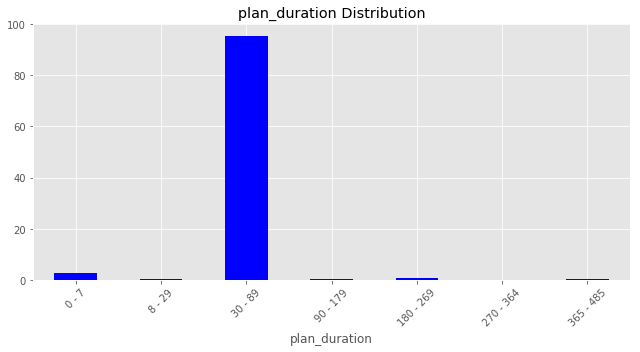

In [48]:
plot_bar(df_transac, ['plan_duration'])

### Auto-renew and active cancellation
Most people who have auto renewal active also don't cancel actively. It is consistent with the fact that most customers don't churn.

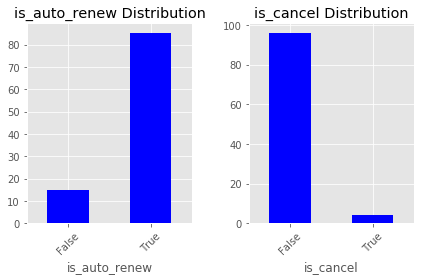

In [49]:
plot_bar(df_transac, ['is_auto_renew' , 'is_cancel'])

In [50]:
# number of active cancellation with automatic renewal enabled
count_cancel_auto = df_transac.loc[df_transac.is_auto_renew == True, 'is_cancel'].sum()
count_auto = (df_transac.is_auto_renew == True).sum()
print('Percentage of active cancellation while auto renew activated = {:.2f}%'.format(count_cancel_auto / count_auto *100))

Percentage of active cancellation while auto renew activated = 4.67%


### Plan list price
90% of list price are below 150. There are 0 list price which indicates missing values.<br>
Top 3 most freqent list price are 99, 129 and 149.

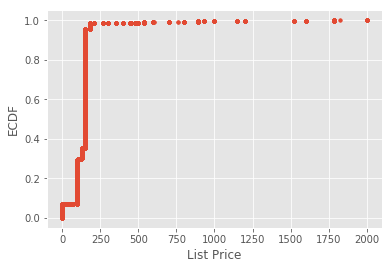

In [51]:
figpllist , axpllist = plt.subplots()
pl_x = df_transac.plan_list_price.sort_values().values
pl_y = np.arange(1, len(pl_x)+1) / len(pl_x)
axpllist.plot(pl_x, pl_y, '.')
axpllist.set_xlabel('List Price')
axpllist.set_ylabel('ECDF')

# save figure to file as png
figpllist.savefig(os.path.join(os.pardir, 'reports', 'figures', 'Plan_list_price_ecdf.png'))

Let's see if we can replace those missing values. Note we won't find a list price replacement for new estimated payment plan days so we should use our plan duration intervals.

In [52]:
# select transactions with no missing list price and group by plan duration then list price
df_plan_grouped = \
        df_transac[df_transac.plan_list_price != 0].groupby(['plan_duration', 'plan_list_price'])

In [53]:
# frequency count of plan duration-list price combination
s_listprice_rpl = df_plan_grouped.msno.count()
# s_listprice_rpl.head(50)

There are multiple list price for the same plan duration! There should be a unique list price for each plan.<br>
This is not the case even if we look at the same data per payment plan days and per calendar year. <br>
Thus we will pick the most frequently occurring plan duration and list price combination.

In [54]:
# move plan_duration from index to column and regroup by keeping the most frequent list price
s_listprice_rpl = s_listprice_rpl.reset_index(level = 0).groupby('plan_duration').msno.nlargest(n=1)

In [55]:
# move list price from index to column
s_listprice_rpl = s_listprice_rpl.reset_index(level = 1)

In [56]:
# remove count column (msno here)
s_listprice_rpl.drop('msno', axis = 1, inplace = True)

In [57]:
s_listprice_rpl
# get mapping value to paste in report
# s_listprice_rpl.to_clipboard()

,plan_list_price
plan_duration,
0 - 7,35
8 - 29,50
30 - 89,149
90 - 179,480
180 - 269,894
270 - 364,1200
365 - 485,1788


Substitute zero list price with our mapping.

In [58]:
df_transac.loc[df_transac.plan_list_price == 0, 'plan_list_price'] = \
                    df_transac.loc[df_transac.plan_list_price == 0, 'plan_duration'].map(s_listprice_rpl.plan_list_price)

### Subscription cost per subscription length
How do subscription length scale with list price ? <br>
One can observe the list price going up with subscription length globally. However, there are overlaps in list price between plan duration except for long term plans (> 365 days) which are clearly the most expensive.

Create bar plot for each auto renew state (True or False). Does not include cancellation transactions as it would be redundant.

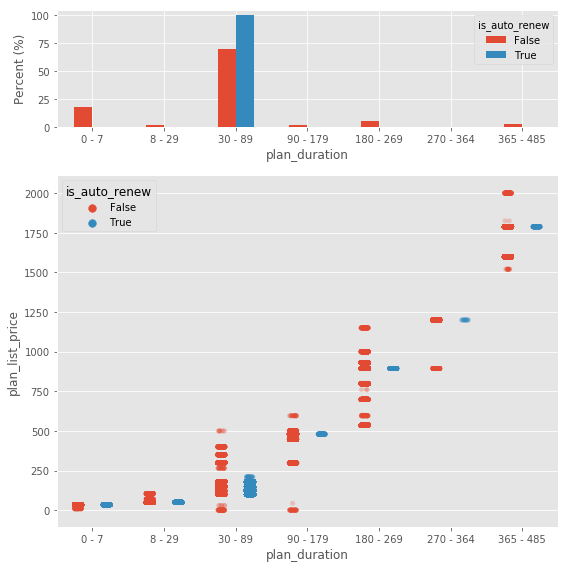

In [59]:
# prepare axis
figCostDays , axCostDays = plt.subplots(2, 1, \
                              figsize=(8, 8), \
                              gridspec_kw=dict(height_ratios=[1, 3]))

# pivot on relevant columns, values can be anything as we are just counting here
df_plan = df_transac[df_transac.is_cancel == False].pivot_table(index = 'plan_duration', columns = 'is_auto_renew',\
                                 values = 'plan_list_price', aggfunc = 'count', fill_value = 0)

# normalize each column by counts
df_plan = df_plan.divide(df_plan.sum()) * 100

# make a bar plot for each auto renew state
df_plan.plot(kind = 'bar', ax = axCostDays[0])

# change tick orientation and add labels
axCostDays[0].tick_params(axis = 'x', rotation = 0)
axCostDays[0].set_ylabel('Percent (%)')
axCostDays[0].set_xlabel('plan_duration')


# use seaborn to add plan list price as another dimension
sns.stripplot(x="plan_duration", y="plan_list_price", hue = 'is_auto_renew',\
              dodge = True, jitter = True, alpha = 0.25,\
              data=df_transac, ax = axCostDays[1])

# sns.swarmplot(x="plan_duration", y="plan_list_price", hue = 'is_auto_renew',\
#               dodge = True, alpha = 0.25,\
#               data=df_transac, ax = axCostDays[1])

plt.tight_layout()

# save figure to file as png
figCostDays.savefig(os.path.join(os.pardir, 'reports', 'figures', 'List_Price_Duration.png'))

The Empirical cumulative distribution function (ECDF) can give us another view when there are too many points to plot.

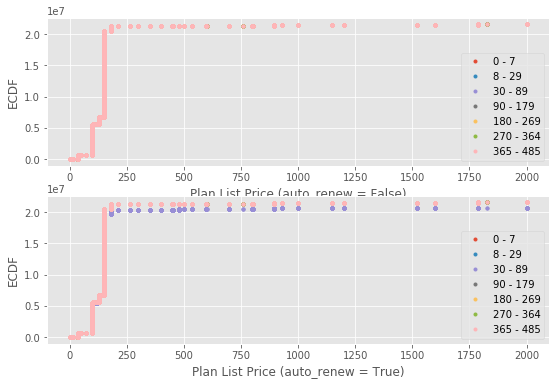

In [60]:
# _ , axEcdf = plt.subplots(1, 2, figsize=(9, 6), gridspec_kw=dict(width_ratios=[3, 1]))
_ , axEcdf = plt.subplots(2, 1, figsize=(9, 6))

for i in range(2):
    # sort your data and plot it versus its percentage increment
    for pl in days_plan_labels:
        filt_pl = (df_transac.is_auto_renew == i ) & (df_transac.plan_duration == pl) & df_transac.is_cancel == False
        pl_x = df_transac.loc[filt_pl, 'plan_list_price'].sort_values().reset_index(drop=True)
        axEcdf[i].plot(pl_x, pl_x.index, linestyle = '', marker='.')
        axEcdf[i].set_xlabel('Plan List Price (auto_renew = ' + str(bool(i)) + ')'  )
        axEcdf[i].set_ylabel('ECDF')
    axEcdf[i].legend(days_plan_labels)

### List price vs paid price
Here we would like to know the difference in price between list price and actual amount paid.

In [61]:
# percent difference between plan price and price actually paid
df_discount_percent = 1 - (df_transac.actual_amount_paid/df_transac.plan_list_price)

It appears that an overwhelming majority of transcations do not have any discount (more than 92%) and some transaction were at no charge. Note that some percentage discount are negative which should not happen as one cannot pay more than the list price. <br>
Let's adjust the actual amount paid to match its corresponding list price in those cases.

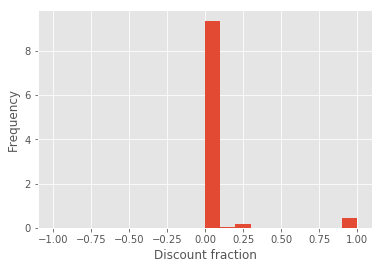

In [62]:
# plot histogram of discounts
_ , axDiscount = plt.subplots()

# plot histogram, bin by 10% intervals
_ = df_discount_percent[df_transac.is_cancel == False].plot(kind = 'hist', range = (-1,1), bins = 20, \
                                                              ax = axDiscount, density = True)

_ = axDiscount.set_xlabel('Discount fraction')
# Note: bin width is 0.1 thus normalization multiplies by 10 (divided by 0.1, see hist documentation).
# It means 100% corresponds to 10 on the y scale.

Same data using Empirical Cumulative Distribution function

Text(0,0.5,'ECDF')

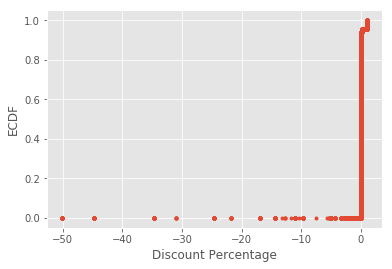

In [63]:
_ , axdisc = plt.subplots()
pl_x = df_discount_percent[df_transac.is_cancel == False].sort_values().values
pl_y = np.arange(1, len(pl_x)+1) / len(pl_x)
axdisc.plot(pl_x, pl_y, '.')
axdisc.set_xlabel('Discount Percentage')
axdisc.set_ylabel('ECDF')

In [64]:
# adjust actual amount paid where discount is negative
df_transac.loc[df_discount_percent < 0, 'actual_amount_paid'] = \
                                        df_transac.loc[df_discount_percent < 0, 'plan_list_price']

Calculate discount again and generate new plot

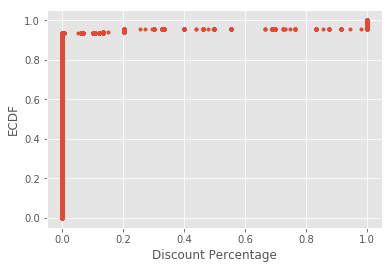

In [65]:
# percent difference between plan price and price actually paid
df_discount_percent = 1 - (df_transac.actual_amount_paid/df_transac.plan_list_price)

figdisc2 , axdisc2 = plt.subplots()
pl_x = df_discount_percent[df_transac.is_cancel == False].sort_values().values
pl_y = np.arange(1, len(pl_x)+1) / len(pl_x)
axdisc2.plot(pl_x, pl_y, '.')
axdisc2.set_xlabel('Discount Percentage')
axdisc2.set_ylabel('ECDF')

# save figure to file as png
figdisc2.savefig(os.path.join(os.pardir, 'reports', 'figures', 'ListPrice_vs_actualAmount.png'))

### Save cleaned transactions

In [66]:
# transaction_inter_dir = os.path.join(os.pardir, 'data', 'interim', 'transactions_clean.csv')
# df_transac.to_csv(transaction_inter_dir, index = False)